# Análisis: Google Play Store 

- Data Source: https://www.kaggle.com/datasets/lava18/google-play-store-apps/data?select=googleplaystore.csv

En este newbook analizaremos el dataset `googleplaysotre` que contiene información de 10K+ aplicaciones disponibles para dispositivos Android.

**Descripción de las variables del dataset:**
- `app`: Nombre de la aplicación.
- `category`: Categoría a la que pertenece la aplicación.
- `rating`: Calificación de la aplicacón.
- `reviews`: Número de comentarios.
- `size`: Tamaño de la aplicación.
- `installs`: Aproximado de la cantidad de descargas que tiene la aplicación.
- `type`: Etiqueta que indica si la aplicación es gratis o de pago.
- `price`: Precio de la aplicación.
- `content_rating`: Clasificación del contenido que ofrece la aplicación.
- `genres`: Generos en los que se encuentra la aplicación, a diferencia de la categoría, una aplicación puede pertenecer a más de un genero.
- `last_updated`: Fecha de última actualización.
- `current_ver`: Versión actual.
- `android_ver`: Versión en android.

**Librerias**

In [1]:
import janitor 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker  as ticker
import seaborn as sns

quantity_formatter = ticker.StrMethodFormatter("{x:,.0f}")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

import modules.utils.paths as path

In [4]:
%run pandas-missing-extension.ipynb

## Carga de datos

In [5]:
file_path = path.data_raw_dir("googleplaystore.csv")
playstore_df = pd.read_csv(file_path)
playstore_df = playstore_df.clean_names(case_type="snake")
playstore_df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
playstore_df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [7]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          9367 non-null   float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10840 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
playstore_df.dtypes.value_counts()

object     12
float64     1
dtype: int64

In [9]:
playstore_df.describe()

,rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Análisis de valores faltantes

In [10]:
df_size = playstore_df.size
total_missing_values = playstore_df.missing.number_missing()
print(f"Total de elementos: {df_size}")
print(f"Total de valores faltantes: {total_missing_values}")
print(f"Total de valores completos: {playstore_df.missing.number_complete()}")

print(f"Observaciones: {playstore_df.shape[0]}")
print(f"Columnas: {playstore_df.shape[1]}")

print(f"Ratio de valores faltantes: {round((total_missing_values/df_size)*100, 3)}")

Total de elementos: 140933
Total de valores faltantes: 1487
Total de valores completos: 139446
Observaciones: 10841
Columnas: 13
Ratio de valores faltantes: 1.055


In [11]:
playstore_df.isna().any()

app               False
category          False
rating             True
reviews           False
size              False
installs          False
type               True
price             False
content_rating     True
genres            False
last_updated      False
current_ver        True
android_ver        True
dtype: bool

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

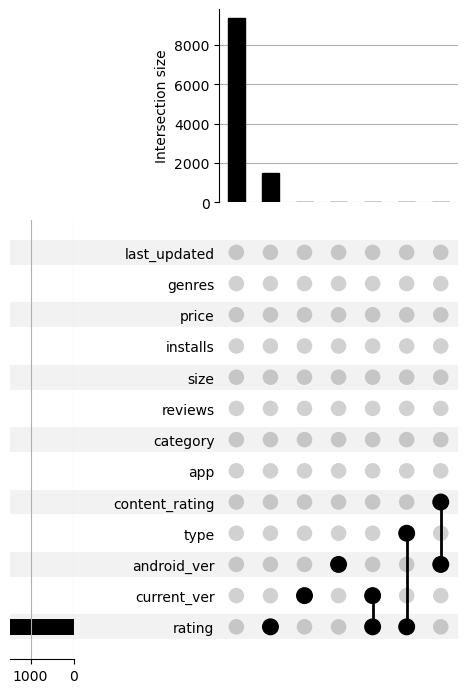

In [12]:
(
  playstore_df
  .missing
  .missing_upsetplot(
    variables=None
  )
)

In [13]:
playstore_df.isna().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

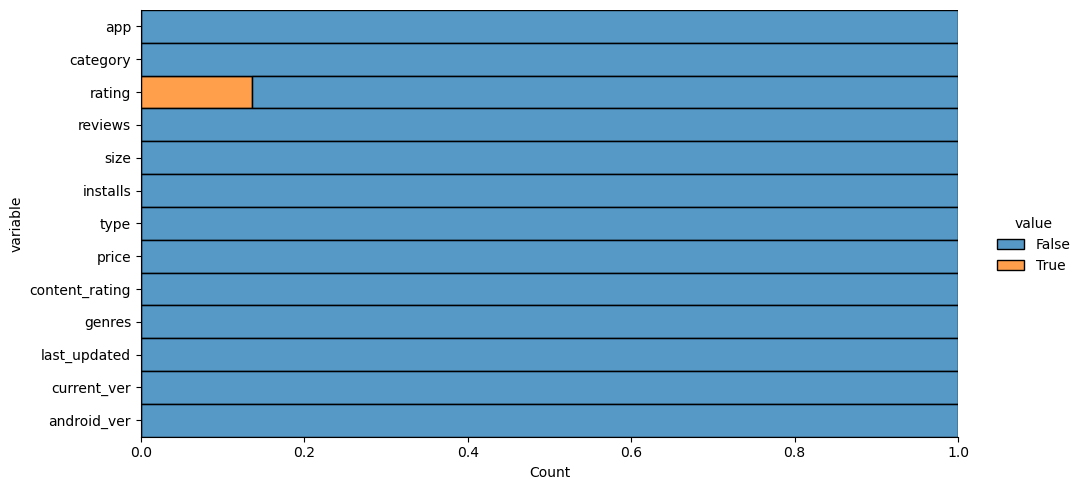

In [14]:
(
  playstore_df
  .isna()
  .melt()
  .pipe(
    lambda df: (
      sns.displot(
        data=df,
        y="variable",
        hue="value",
        multiple= "fill",
        aspect=2        
      )
    )
  )
)
plt.show()

El total de valores faltantes corresponde solo al $1.055\%$ de los datos, se concentran mayormente en la variable `rating`, por lo tanto procederemos a impotarlos con el valor de la mediana.

En cuanto al resto variables con escasos valores faltantes procederemos a eliminarlos.

In [15]:
rating_median = playstore_df["rating"].median()
playstore_df["rating"] = playstore_df["rating"].fillna(rating_median)
playstore_df.dropna(inplace=True)

## Limpieza 

### Duplicados

In [16]:
subset = playstore_df.columns.to_list()
subset.pop(subset.index("reviews"))

'reviews'

In [17]:
total_duplicated = playstore_df.duplicated(subset=subset).sum()
duplicated_proportion = round(total_duplicated/len(playstore_df) * 100, 2)
print("Total de filas duplicadas: {:,.0f} \nProporcion: {}%".format(total_duplicated, duplicated_proportion))

Total de filas duplicadas: 1,058 
Proporcion: 9.77%


In [18]:
playstore_df[playstore_df.duplicated(subset=subset)].sort_values(by="app", ascending=True).head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [19]:
playstore_df[playstore_df["app"].isin(["10 Best Foods for You", "1800 Contacts - Lens Store"])]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up


In [20]:
playstore_df.drop_duplicates(subset=subset, keep="first", inplace=True)
playstore_df.duplicated().sum()

0

### Cambio de tipos de datos

In [21]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9771 non-null   object 
 1   category        9771 non-null   object 
 2   rating          9771 non-null   float64
 3   reviews         9771 non-null   object 
 4   size            9771 non-null   object 
 5   installs        9771 non-null   object 
 6   type            9771 non-null   object 
 7   price           9771 non-null   object 
 8   content_rating  9771 non-null   object 
 9   genres          9771 non-null   object 
 10  last_updated    9771 non-null   object 
 11  current_ver     9771 non-null   object 
 12  android_ver     9771 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [22]:
playstore_df.head(5)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
playstore_df.nunique()

app               9648
category            33
rating              39
reviews           5437
size               457
installs            20
type                 2
price               92
content_rating       6
genres             119
last_updated      1376
current_ver       2831
android_ver         33
dtype: int64

Variables con tipo de dato incorrecto:
- `reviews`: De `object` a `int64`.
- `size`:  De `object` `float64`.
- `installs`: De `object` a `int64`.
- `price`: De `object`  `float64`.
- `last_updated`: De `object` a `datetime`

**`reviews`**

In [24]:
playstore_df["reviews"] = playstore_df["reviews"].astype("int64")

**`size`**

In [25]:
print(f"Elementos únicos: {playstore_df['size'].nunique()}")
playstore_df["size"].unique()

Elementos únicos: 457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [26]:
(
  playstore_df["size"]
  .apply(
    lambda val: "".join(char for char in val if not char.isdigit() and char != ".")
  )
  .unique()
)


array(['M', 'Varies with device', 'k'], dtype=object)

In [27]:
"""
1. Transformar en nan los row que tienen "Varies with device"
2. Quitar caracteres del ".", "M" y "k" 
3. Convertirlos a valores float64
4. Uniificar tamaño de M y K a Bytes, luego a Megabytes
5. Calcular la mediana 
6. Imputar la mediana
"""

print(f'{playstore_df.loc[playstore_df["size"] == "Varies with device", "size"].value_counts()}')

# 1. Cambiar por valores nan
playstore_df.loc[playstore_df["size"] == "Varies with device", "size"] = np.NaN

Varies with device    1266
Name: size, dtype: int64


In [28]:
playstore_df["size_mb"] = (
  playstore_df["size"]
  .str
  .extract(r'(?P<value>\d+\.?\d*?)(?P<type_size>[Mk])') # 2. Quitar caracteres
  .assign(
    value = lambda df: df["value"].astype("float64") #3. Convertirlos a valores float64
  ) # 4. Unificar tamaño de M y K a Bytes, luego a Megabytes
  .apply( 
    lambda row: (row["value"]*1024*1024) if row["type_size"] == "M" else (row["value"]*1024) if row["type_size"] == "k"  else row["value"],
    axis=1
  )
  .apply(lambda val: val/(1024*1024))
)

Imputamos el tamaño de la aplicación que tenia el valor "Varies with device" con la mediana de las aplicaciones en Megabytes.

In [29]:
size_median = playstore_df["size_mb"].median() # 5. Calculamos la mediana
playstore_df["size"] = playstore_df["size_mb"].fillna(size_median) # 6. Imputamos la mediana.
del playstore_df["size_mb"]

**`installs`**

In [30]:
print(f"Elementos únicos: {playstore_df['installs'].nunique()}")
playstore_df["installs"].unique()

Elementos únicos: 20


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [31]:
playstore_df["installs"] = (
  playstore_df["installs"]
  .apply(
    lambda val: "".join(char for char in val if char.isdigit())
  )
  .astype("int64")
)

**`price`**

In [32]:
print(f"Elementos únicos: {playstore_df['price'].nunique()}")
playstore_df["price"].unique()

Elementos únicos: 92


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [33]:
playstore_df["price"] = (
  playstore_df["price"]
  .apply(
    lambda val: val.replace("$", "")
  )
  .astype("float64")
)

**`last_updated`**

In [34]:
playstore_df["last_updated"] = pd.to_datetime(playstore_df["last_updated"])

### Eliminación de variables

Para el objetivo de este análisis las variables `current_ver` y `android_ver` no son necesarias, por lo tanto podemos prescindir de ellas.

In [35]:
playstore_df = playstore_df.iloc[:, :-2]

In [36]:
playstore_df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [37]:
display(playstore_df.info(), playstore_df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             9771 non-null   object        
 1   category        9771 non-null   object        
 2   rating          9771 non-null   float64       
 3   reviews         9771 non-null   int64         
 4   size            9771 non-null   float64       
 5   installs        9771 non-null   int64         
 6   type            9771 non-null   object        
 7   price           9771 non-null   float64       
 8   content_rating  9771 non-null   object        
 9   genres          9771 non-null   object        
 10  last_updated    9771 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 916.0+ KB


None

object            5
float64           3
int64             2
datetime64[ns]    1
dtype: int64

## Análisis

### Distribución de Rating

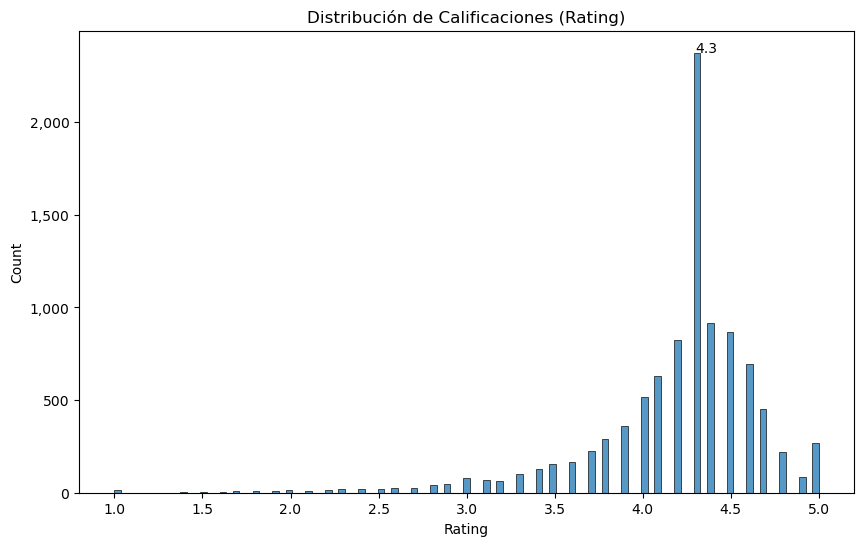

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(
  data=playstore_df,
  x="rating",
  ax=ax,
)

ax.set_title("Distribución de Calificaciones (Rating)")
ax.set_xlabel("Rating")
ax.yaxis.set_major_formatter(quantity_formatter)

max_rating = playstore_df["rating"].value_counts().head(1)
 
plt.annotate(
  f"{max_rating.idxmax()}",
  xy=(max_rating.idxmax(), (max_rating.iloc[0])),
);


In [39]:
playstore_df["rating"].describe()

count    9771.000000
mean        4.194289
std         0.494484
min         1.000000
25%         4.100000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [40]:
# Test de outliner.
Q1 = playstore_df["rating"].quantile(.25)
Q3 = playstore_df["rating"].quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q1 + 1.5 * IQR

non_rating_outliers = playstore_df[(playstore_df["rating"] >= bottom) & (playstore_df["rating"] <= top)]

len(playstore_df) - len(non_rating_outliers)

1296

### Aplicaciones más populares por categoría

In [41]:
installs_reviews_by_categories = playstore_df.groupby(["category"])[["reviews", "installs"]].sum().reset_index()

most_downloaded_categories = installs_reviews_by_categories[["category", "installs"]].nlargest(10,"installs")
most_reviewed_categories = installs_reviews_by_categories[["category", "reviews"]].nlargest(10,"reviews")

most_downloaded_categories

,category,installs
14,GAME,13993924415
6,COMMUNICATION,11039276251
11,FAMILY,8995582405
29,TOOLS,8122271905
25,PRODUCTIVITY,6808091369
24,PHOTOGRAPHY,5769147655
27,SOCIAL,5497867902
31,VIDEO_PLAYERS,4432002720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2879217760


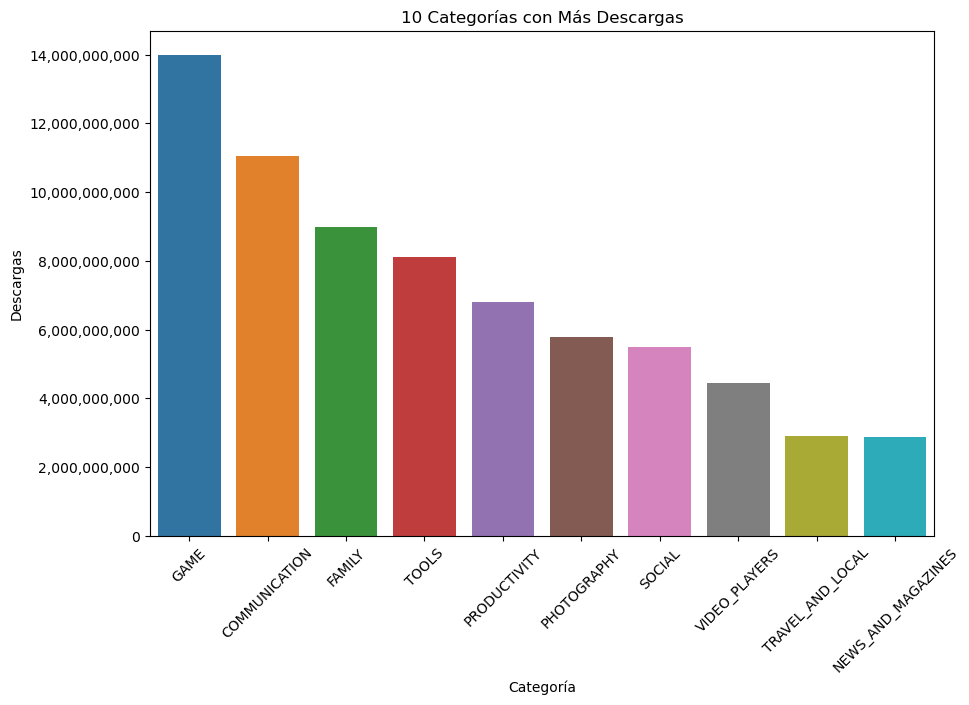

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(
  most_downloaded_categories,
  x="category",
  y="installs",
  ax=ax
)
ax.set_title("10 Categorías con Más Descargas")
ax.set_ylabel("Descargas")
ax.set_xlabel("Categoría")

ax.yaxis.set_major_formatter(quantity_formatter)

plt.tight_layout()
plt.xticks(rotation=45);

### Relación entre Tamaño de las Apps y su Popularidad

Distribución del tamaño de las apps

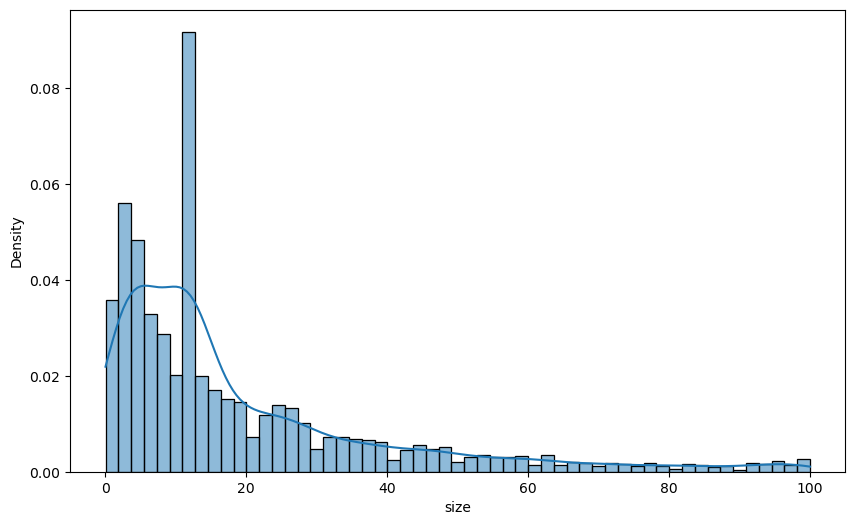

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(
  data=playstore_df,
  x="size",
  stat="density",
  kde=True
);

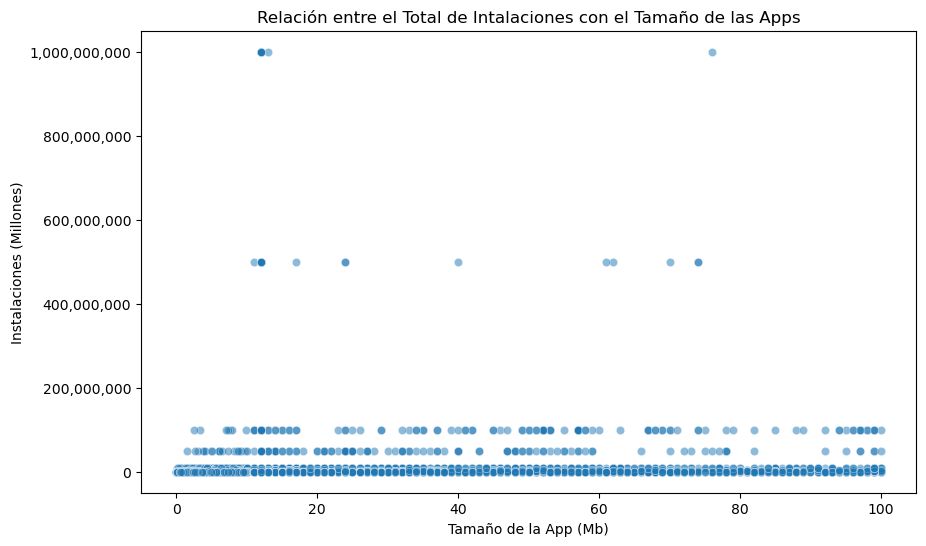

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
  data=playstore_df,
  x="size",
  y="installs",
  ax=ax,
  alpha=.5
)

ax.set_title("Relación entre el Total de Intalaciones con el Tamaño de las Apps")
ax.set_ylabel("Instalaciones (Millones)")
ax.set_xlabel("Tamaño de la App (Mb)")

ax.yaxis.set_major_formatter(quantity_formatter);

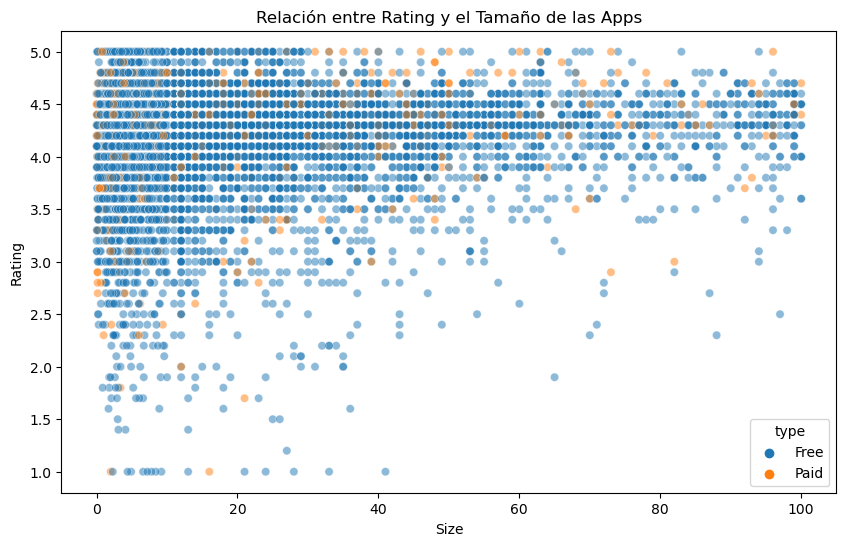

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
  data=playstore_df,
  y="rating",
  x="size",
  ax=ax,
  alpha=.5,
  hue="type"
)

ax.set_title("Relación entre Rating y el Tamaño de las Apps")
ax.set_xlabel("Size")
ax.set_ylabel("Rating");

### Aplicaciones Gratuitas vs Pago

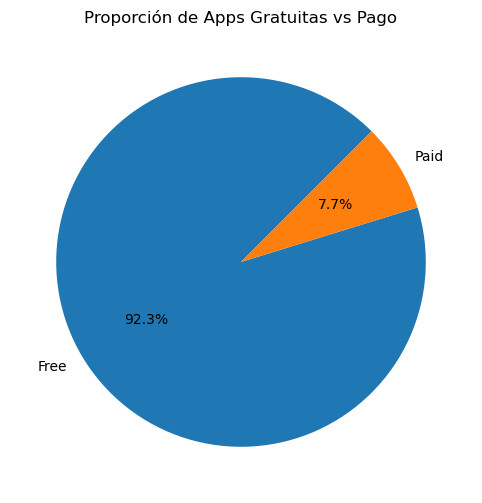

In [46]:
free_vs_paid = playstore_df["type"].value_counts()


fig, ax = plt.subplots(figsize=(10,6))

free_vs_paid.plot(
  kind="pie",
  ax=ax,
  autopct="%1.1f%%",
  startangle=45,
  ylabel="",
  title="Proporción de Apps Gratuitas vs Pago"
);

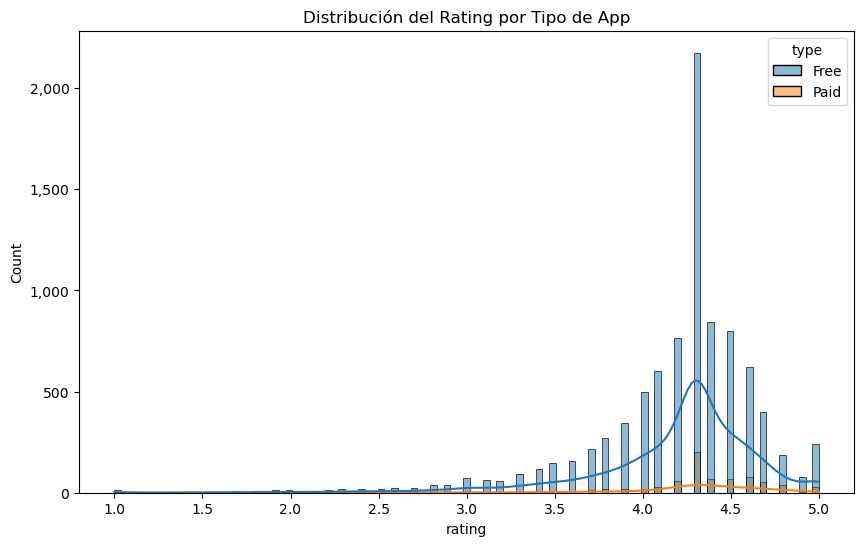

In [47]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(
  data=playstore_df,
  x="rating",
  hue="type",
  kde=True
)
ax.set_title("Distribución del Rating por Tipo de App")
ax.yaxis.set_major_formatter(quantity_formatter);

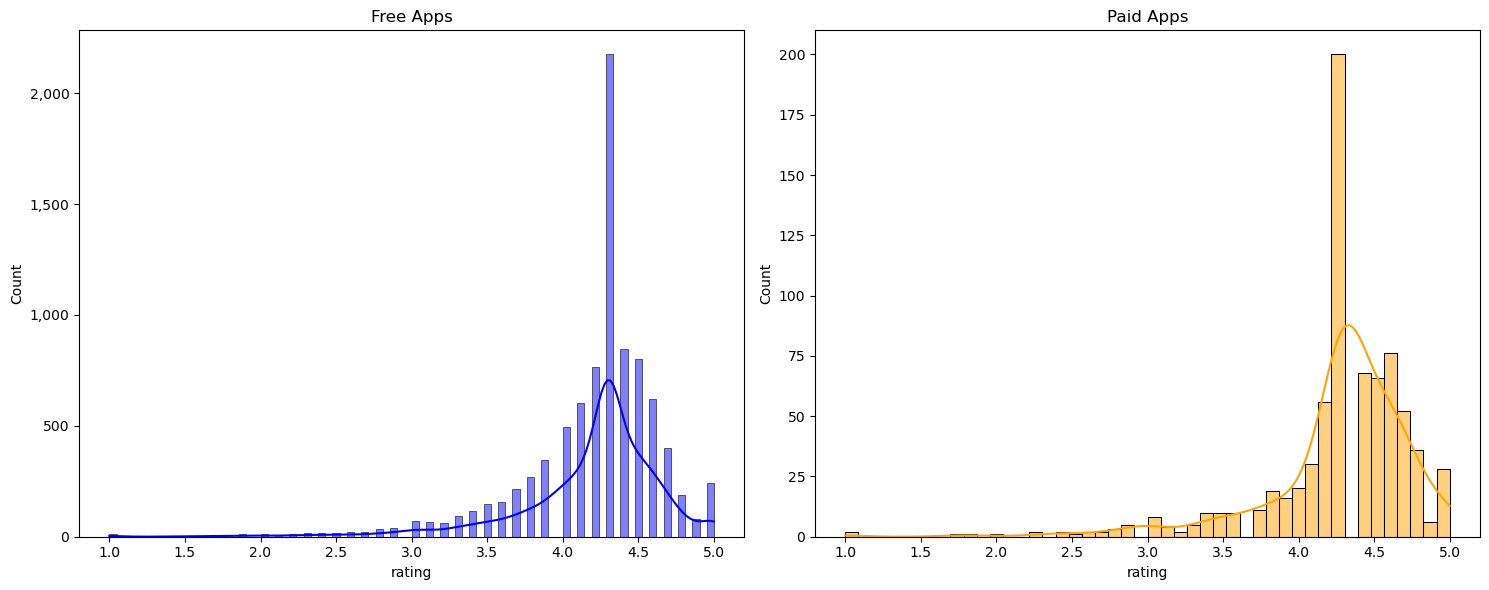

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes = axes.flatten()

types = ["Free", "Paid"]
colors = ["blue", "orange"]

for ax, type, color in zip(axes, types, colors):
  df = playstore_df[playstore_df["type"] == type]
  sns.histplot(
    data=df,
    x="rating",
    alpha=.5,
    color=color,
    ax=ax,
    kde=True
  )

  ax.set_title(f"{type} Apps")
  ax.yaxis.set_major_formatter(quantity_formatter)


plt.tight_layout();

### Análisis Temporal de las Actualizaciones

In [77]:
playstore_df["month_updated"] = playstore_df["last_updated"].apply(lambda x: str(x.year) + "-" + str(x.month)).apply(lambda x: pd.to_datetime(x))
updates_per_month = playstore_df.groupby("month_updated").size().reset_index(name="count")
updates_per_month 

,month_updated,count
0,2010-05-01,1
1,2011-01-01,1
2,2011-03-01,1
3,2011-04-01,3
4,2011-05-01,1
...,...,...
83,2018-04-01,395
84,2018-05-01,694
85,2018-06-01,920
86,2018-07-01,2375


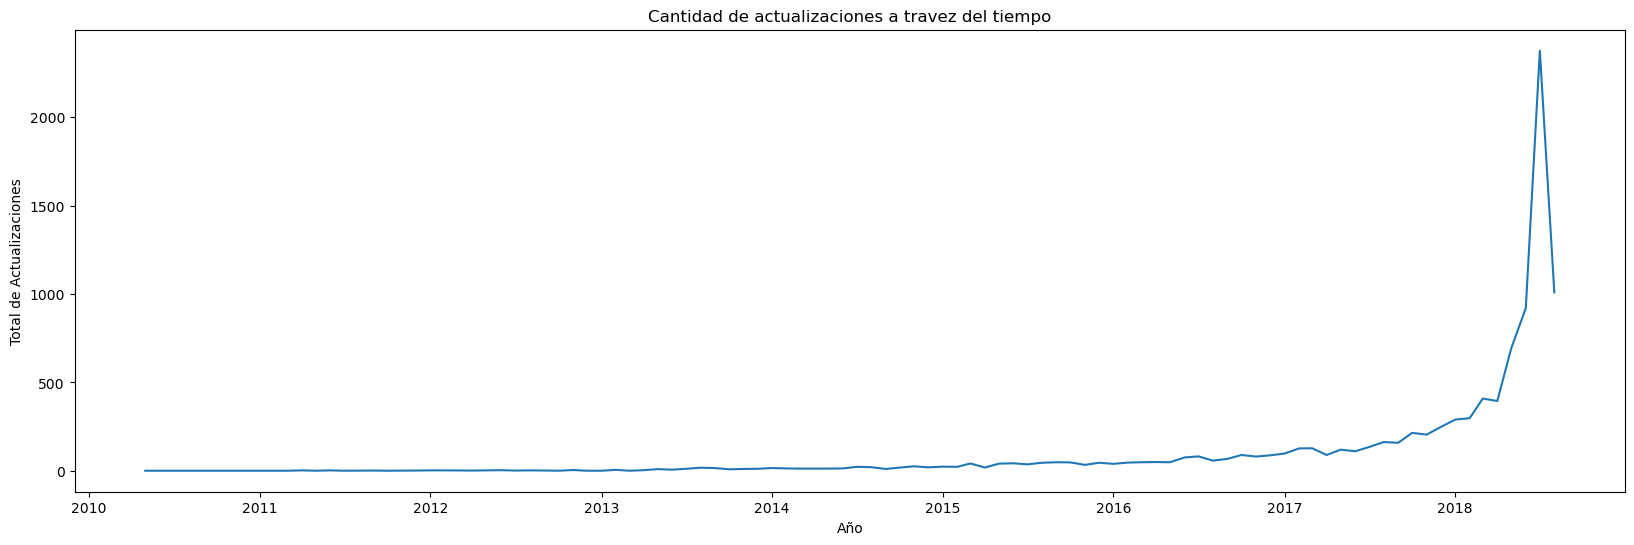

In [84]:
plt.figure(figsize=(20,6))
plt.plot(
  updates_per_month["month_updated"],
  updates_per_month["count"],
)

plt.title("Cantidad de actualizaciones a travez del tiempo")
plt.xlabel("Año")
plt.ylabel("Total de Actualizaciones");
